In [36]:
import numpy as np
import math
import numpy.linalg as la
from matplotlib import pyplot as plt
from tqdm import tqdm # if we want a fancy progress bar!

In [50]:
# recall the algorithm of gradient descent:
# goal: minimize a function, f
# method: given access to the derivative, f_prime
#   - pick a starting point, x = random, x = 0, whatever you think makes sense in situ
#   - repeat until "done"
#      - update x <- x - f_prime(x) * descent_rate
#      - optionally, update descent_rate, e.g. to slow down in later iterations

In [69]:
def grad_desc(f_prime):
    """ do grad descent using f_prime as access to the derivative at a point """
    x = 0.9
    old_x = 0
    learning_rate = 1
    while abs( x - old_x ) > 0.001:
        old_x = x
        x -= f_prime(x)*learning_rate
        learning_rate *= 0.9
#         print(x)
    return x
    

In [35]:
def x_squared_prime(x,a):
    """return derivative of f(x) = (x-a)**2 at x"""
    # return 2 * x # for x**2
    return 2*(x-a)

def x_cube_prime(x,a):
    """return derivative of f(x) = (x-a)**3 at x"""
    # return 2 * x # for x**2
    return 3 * (x-a)**2

In [31]:
def xsp_wrapper(x):
    return x_squared_prime(x,2)

In [34]:
# grad_desc(lambda x: x_squared_prime(x,2))
grad_desc(xsp_wrapper)

3.1
1.1199999999999999
2.5456000000000003
1.7501151999999998
2.0780140345600002
1.9858810200253312
2.000887829698767
2.0000385373134706


2.0000385373134706

In [37]:
# grad_desc(lambda x: x_cube_prime(x,0))

# Now with Linear Regression...

In [44]:
def bestFitGradientDescent(data,learning_rate=1,iters=1000,gamma=1):
    """take in data as a list of (x,y) pairs and calculate alpha and beta of lobf"""
    alpha = 2
    beta = 2
    
    for _ in tqdm(range(iters)):
        alpha_grad = 0
        beta_grad = 0
        # print(f'alpha: {alpha}, beta: {beta}')
        # calculate the partial derivatives
        for row in data:
            alpha_grad += 2*( alpha * row[0] + beta - row[1] ) * row[0]
            beta_grad += 2* ( alpha * row[0] + beta - row[1] )
            
        # do our gradient descent step
        alpha -= learning_rate * alpha_grad
        beta -= learning_rate * beta_grad
        learning_rate *= gamma
    
    return alpha, beta

In [24]:
xs = np.arange(1,10,0.1)
points = np.array([ [x, x + np.random.normal(0,0.5)] for x in xs ])

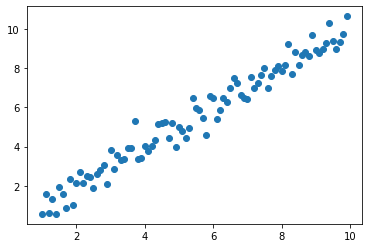

In [19]:
plt.scatter(points[:,0], points[:,1])

In [42]:
a,b = bestFitGradientDescent(points,0.0001)

100%|██████████| 1000/1000 [00:00<00:00, 6979.58it/s]


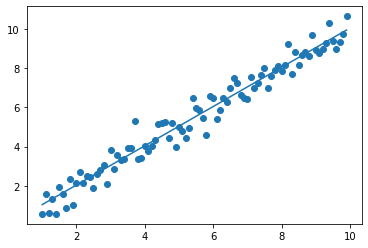

In [22]:
plt.scatter(points[:,0], points[:,1])
plt.plot(xs, [a*x + b for x in xs])

In [43]:
(a,b)

(0.9964916977712269, 0.028714606872159758)

## Analytic Solution

Given a matrix $X \in \mathbb{R}^{N \times d}$ of obervation sites and vector $Y \in \mathbb{R}^N$ of observed values, we really want to find $\beta \in \mathbb{R}^d$ to be the vector of parameters of the linear model.

The error can now be written as $$ \big|\big| X \beta - Y \big | \big |^2. $$
Then we can do some linear algebra calculus, set error to 0 and solve, to get 

$$ \beta^* = (X^T X)^{-1} X^T Y $$

In [40]:
X = np.copy(points)
X[:,1] = 1
Y = np.array([points[:,1]]).T

beta_star = la.inv(X.T @ X) @ X.T @ Y

In [41]:
beta_star

array([[ 1.00711695],
       [-0.04199805]])